In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

C:\Users\kodonoghue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


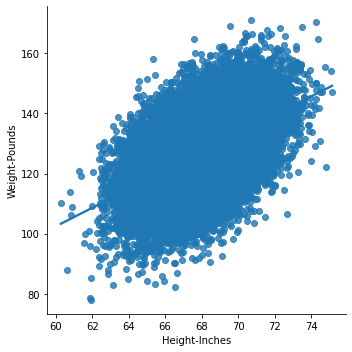

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/regression-concepts/master/height-weight-25k.csv")

sns.lmplot("Height-Inches", "Weight-Pounds", data=df)

C:\Users\kodonoghue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


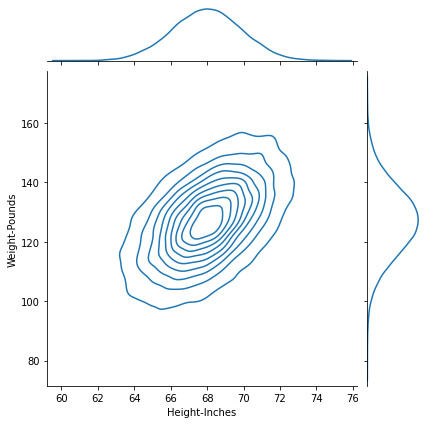

In [4]:
sns.jointplot("Height-Inches", "Weight-Pounds", data=df, kind="kde");

# Train,Test Split

In [5]:

# Extract the features and labels from the dataframe
y = df['Weight-Pounds'].values #Target
y = y.reshape(-1, 1)
X = df['Height-Inches'].values #Feature(s)
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 1) (20000, 1)
(5000, 1) (5000, 1)


### Linear Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_predicted = lm.predict(X_test)

#RMSE Root Mean Squared Error
rms = sqrt(mean_squared_error(y_predicted, y_test))
rms

10.12618707779415

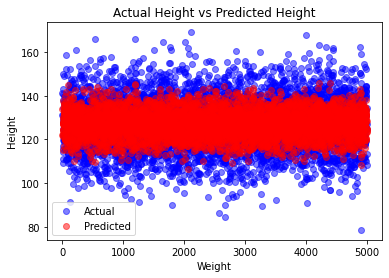

In [7]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.5)
ax.scatter(x = range(0, y_predicted.size), y=y_predicted, c = 'red', label = 'Predicted', alpha = 0.5)

plt.title('Actual Height vs Predicted Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

# PyTorch :)

First Convert Data to float32

In [8]:
# Training Data
x_train = np.array(X_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

# Test Data
x_test = np.array(X_test, dtype=np.float32)
x_test = x_test.reshape(-1, 1)
y_test = np.array(y_test, dtype=np.float32)
y_test = y_test.reshape(-1, 1)

In [9]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [10]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.0001 
epochs = 1000

model = linearRegression(inputDim, outputDim)
model.cuda()

AssertionError: Torch not compiled with CUDA enabled